In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [43]:
def probs(a, b, c, Ew1, Ebp):
    shift = 16
    end = 24
    probs = []
    for i in range(end):
        if i in range(0, shift):
            Et = i*Ebp
        if i in range(shift, end):
            Et = Ew1 + i*Ebp
        p = b/(1+a*np.exp(Et)) + c
        probs.append(p)
    return probs

In [44]:
def minimizee(x):
    data_dCas9_TXTL = [12.56, 15.07, 82.62, 90.42, 161.29, 141.18, 146.34, 146.87, 98.66, 
                       162.10, 140.57, 142.91, 151.56, 160.66, 185.55]
    pick = [0, 5, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23]
    fit_probs = np.take(probs(x[0], x[1], x[2], x[3], x[4]),
                        pick)
    return np.sum(np.square(np.subtract(data_dCas9_TXTL, fit_probs)))

In [45]:
bounds = [(0, 100000), (160, 190), (0, 30), (2, 15), (-0.5, -3)]

In [46]:
#Fitting
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 200, popsize = 100)

In [47]:
new_x = result.x

In [48]:
new_x

array([408.08205916, 160.00151027,   1.68866359,   5.59756362,
        -0.73080954])

In [49]:
full_length = probs(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4])
x = np.arange(0, 30, 1)

In [50]:
data_dCas9_TXTL = [[0, 5, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23],
        [12.56, 15.07, 82.62, 90.42, 161.29, 141.18, 146.34, 146.87, 98.66, 162.10, 140.57, 142.91, 151.56, 160.66, 185.55],
        [0.51, 1.6, 5.61, 5.37, 9.73, 9.09, 15.05, 11.77, 9.02, 3.19, 6.16, 5.37, 3.13, 5.12, 6.55]]

In [51]:
E_array = []
E = 0
for j in range(24):
    E_array.append(E)
    E = E + new_x[4]
    if j == 15:
        E = E + new_x[3]

In [52]:
E_array

[0,
 -0.7308095379781476,
 -1.4616190759562953,
 -2.192428613934443,
 -2.9232381519125905,
 -3.654047689890738,
 -4.384857227868886,
 -5.115666765847033,
 -5.846476303825181,
 -6.577285841803329,
 -7.308095379781477,
 -8.038904917759625,
 -8.769714455737773,
 -9.500523993715921,
 -10.23133353169407,
 -10.962143069672218,
 -6.095388987086042,
 -6.826198525064189,
 -7.557008063042337,
 -8.287817601020485,
 -9.018627138998633,
 -9.749436676976782,
 -10.48024621495493,
 -11.211055752933078]

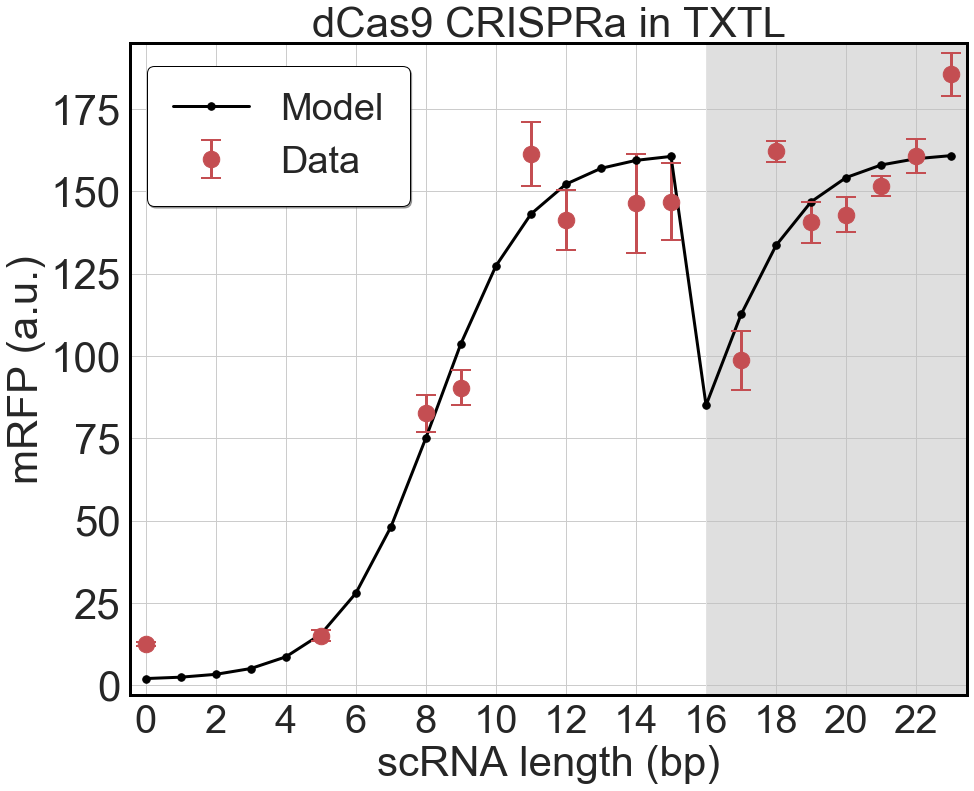

In [66]:
ax = plt.axes()
plt.plot(x[:24], full_length[:24], lw = 3, c = 'black', label = 'Model', marker = '.', ms = '15')
plt.errorbar(data_dCas9_TXTL[0], data_dCas9_TXTL[1], data_dCas9_TXTL[2], fmt = '.', 
             ecolor = 'r', capsize = 10, elinewidth = 3,
             capthick = 2, color = 'r', ms = '33', label = 'Data')
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('dCas9 CRISPRa in TXTL', fontsize = 42)
plt.ylabel('mRFP (a.u.)', fontsize = 42)
plt.xlabel('scRNA length (bp)', fontsize = 42)
plt.xticks(np.arange(0, 33, 2), fontsize = 40)
plt.yticks(fontsize = 42)
plt.xlim(-0.45, 23.45)
plt.ylim(-3, 195)
plt.axvspan(16, 24, facecolor='silver', alpha=0.5)
plt.rcParams["figure.figsize"] = (15, 12)
first_legend = plt.legend(loc=[0.02, 0.75], fancybox =True, borderpad = 0.7, framealpha =1,
                         fontsize = 38, edgecolor = 'black', shadow = 'True')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.show()